In [1]:
import torch
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.models import ResNet18_Weights
import numpy as np
import torchvision.transforms as transforms        
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter,raps_imagenet_real_scatter,saps_imagenet_real_scatter

#  Preprocess
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# load pre-trained model 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1).to(device)


# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=2)
model = ModelWithTemperature(model, temperature = 1.0).to(device)
model.set_temperature(train_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.1

Before temperature - NLL: 1.325, ECE: 0.024
Optimal temperature: 0.993
After temperature - NLL: 1.325, ECE: 0.024


APS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9191 ± 0.0019
Final Average Prediction Set Size: 15.36 ± 0.33
Final Average Coverage: 0.8991 ± 0.0030
Final Average Real Probability: 0.8128 ± 0.0036


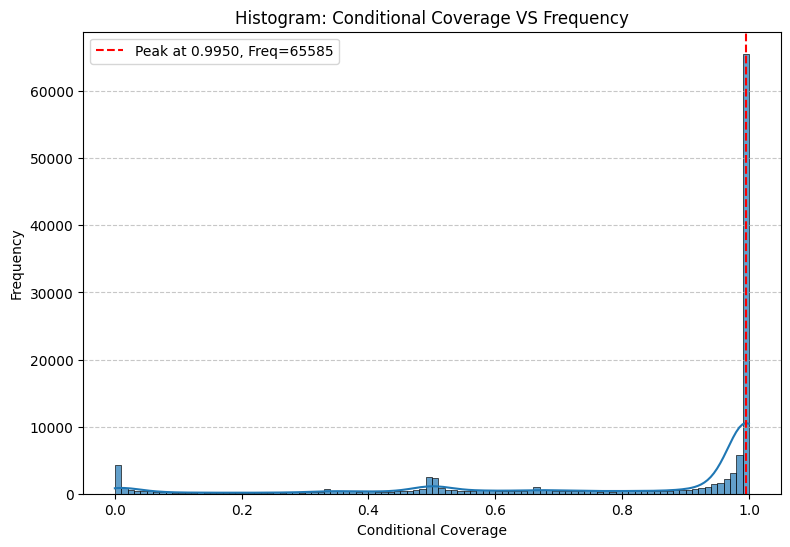

65585 (52.74%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9841 ± 0.0015
Final Average Prediction Set Size: 4.43 ± 0.04
Final Average Coverage: 0.8994 ± 0.0021
Final Average Real Probability: 0.7673 ± 0.0024


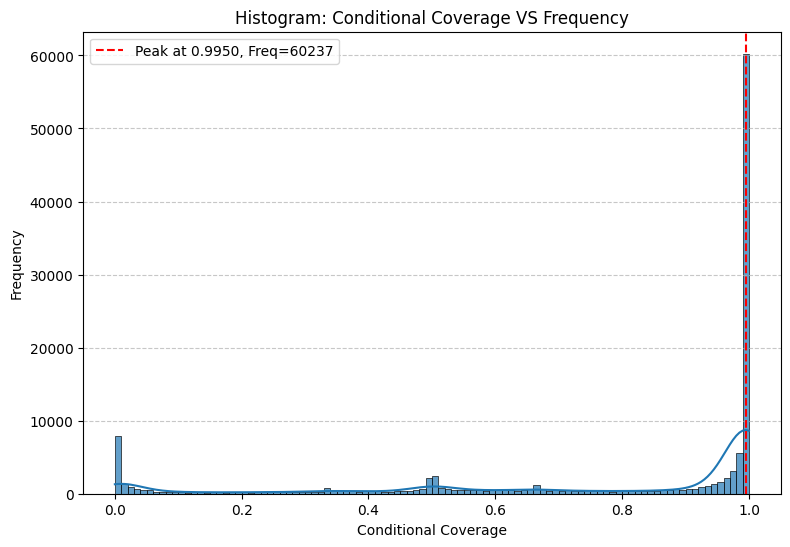

60237 (48.44%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.1, k_reg=6, num_runs=10, alpha=0.1, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0273 ± 0.0050
Final Average Prediction Set Size: 4.18 ± 0.04
Final Average Coverage: 0.8997 ± 0.0018
Final Average Real Probability: 0.7627 ± 0.0025


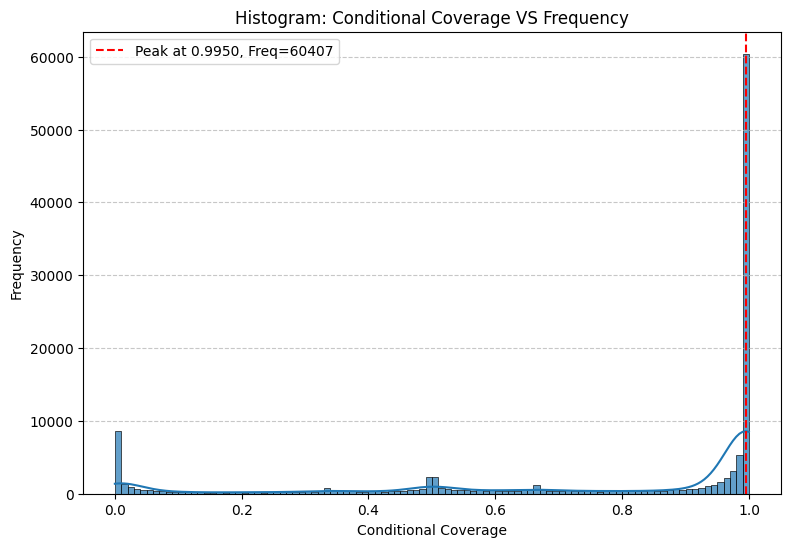

60407 (48.57%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.1, num_runs=10, alpha=0.1, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9191 ± 0.0019
Final Average Prediction Set Size: 15.36 ± 0.33
Final Average Coverage: 0.8991 ± 0.0030
Final Average Real Probability: 0.8128 ± 0.0036


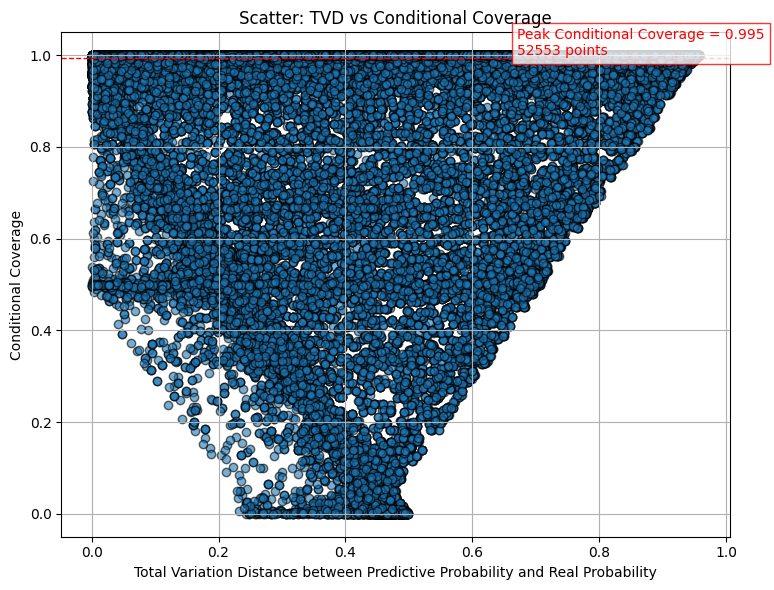

Peak Conditional Coverage = 0.995, with 52553 samples

=== Count Regions Summary ===
36487 (29.3%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
39074 (31.4%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
29157 (23.4%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.85911', '0.06851']
  Real Probability Set      : ['0.99121', '0.00226']
Sample 2:
  Predictive Probability Set: ['0.95995']
  Real Probability Set      : ['0.83468']
Sample 3:
  Predictive Probability Set: ['0.54618', '0.39328']
  Real Probability Set      : ['0.50186', '0.41303']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.44511', '0.23289', '0.08599', '0.06501', '0.04560', '0.04185']
  Real Probability Set      : ['0.03620', '0.03620', '0.00000', '0.03620', '0.03620', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.22115', '0.17617', '0.13617', '

In [5]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9841 ± 0.0015
Final Average Prediction Set Size: 4.43 ± 0.04
Final Average Coverage: 0.8994 ± 0.0021
Final Average Real Probability: 0.7673 ± 0.0024


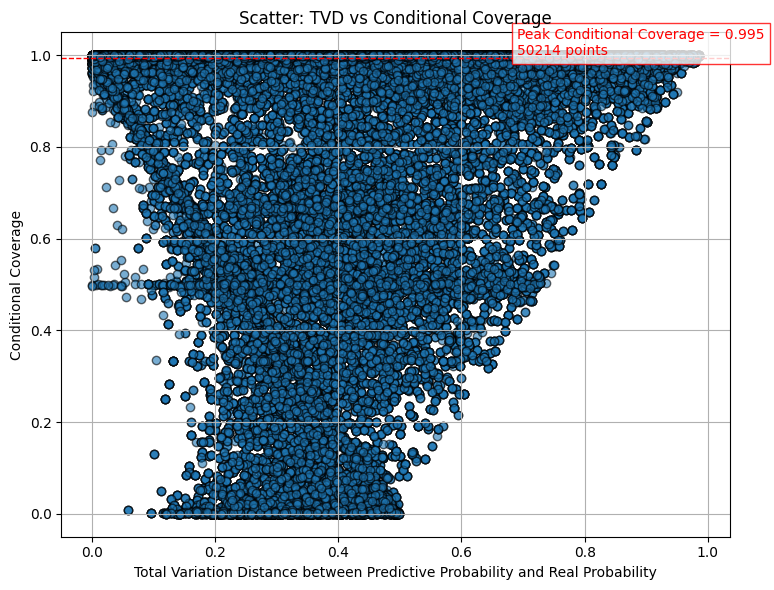

Peak Conditional Coverage = 0.995, with 50214 samples

=== Count Regions Summary ===
41483 (33.4%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
31800 (25.6%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
36388 (29.3%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.97370']
  Real Probability Set      : ['0.99958']
Sample 2:
  Predictive Probability Set: ['0.89913', '0.05092', '0.00959', '0.00514', '0.00386', '0.00344']
  Real Probability Set      : ['0.99835', '0.00083', '0.00083', '0.00000', '0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.86277', '0.05224', '0.04578', '0.02968']
  Real Probability Set      : ['0.95166', '0.00170', '0.04493', '0.00170']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.85552', '0.03439', '0.03116', '0.01505', '0.01345', '0.00662']
  Real Probability Set      : ['0.00082'

In [6]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.1, k_reg=6, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0273 ± 0.0050
Final Average Prediction Set Size: 4.18 ± 0.04
Final Average Coverage: 0.8997 ± 0.0018
Final Average Real Probability: 0.7627 ± 0.0025


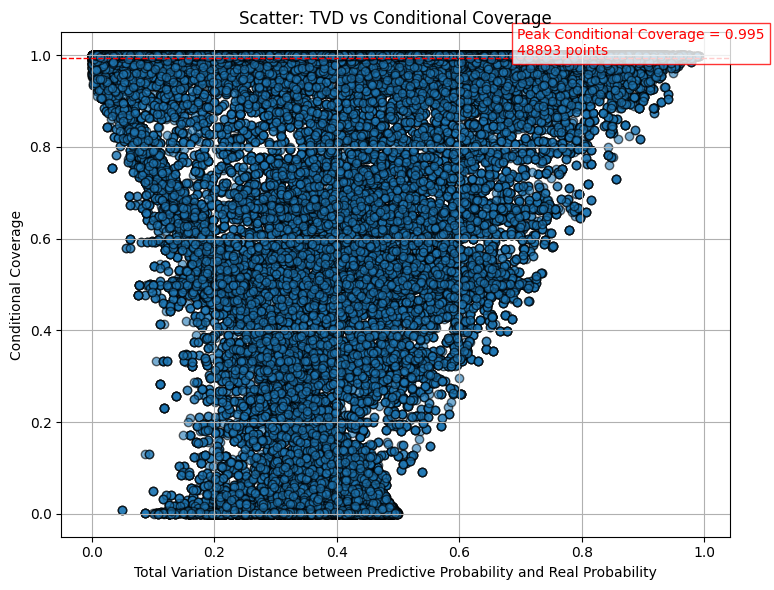

Peak Conditional Coverage = 0.995, with 48893 samples

=== Count Regions Summary ===
40447 (32.5%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
31176 (25.1%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
36921 (29.7%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.86131', '0.04624']
  Real Probability Set      : ['0.99523', '0.00159']
Sample 2:
  Predictive Probability Set: ['0.95865', '0.02329']
  Real Probability Set      : ['0.99909', '0.00045']
Sample 3:
  Predictive Probability Set: ['0.52024', '0.47875', '0.00019', '0.00018', '0.00010', '0.00009']
  Real Probability Set      : ['0.50009', '0.49907', '0.00021', '0.00021', '0.00021', '0.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.29482', '0.12792', '0.09092', '0.06954', '0.06745', '0.04747', '0.04038', '0.03330']
  Real Probability Set      : ['0.00000'

In [7]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.1, num_runs=10, alpha=0.1)